### Gráficos para análise do desempenho da MLP

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("csvs/grid_search_results.csv")

#### Heatmap
Utilizado para identificar a melhor combinação de hiperparâmetros que maximiza a acurácia do modelo.
- As regiões do heatmap com maior acurácia destacam as melhores configurações onde a combinação de hiperparâmetros maximizou a acurácia do modelo

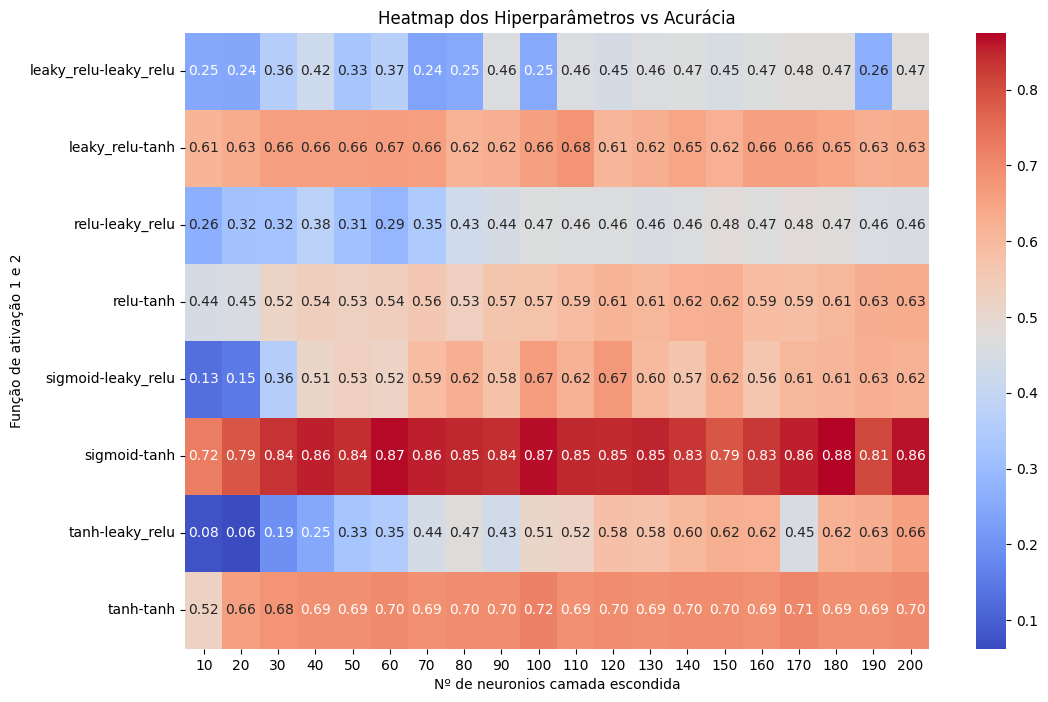

In [5]:
# Pivotar os dados para criar um heatmap
heatmap_data = df.pivot_table(values='Acurácia', 
                              index=['Função de ativação 1', 'Função de ativação 2'], 
                              columns='Nº de neuronios camada escondida')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap dos Hiperparâmetros vs Acurácia')
plt.xlabel('Nº de neuronios camada escondida')
plt.ylabel('Função de ativação 1 e 2')
plt.show()


#### Box-plot Erro médio 


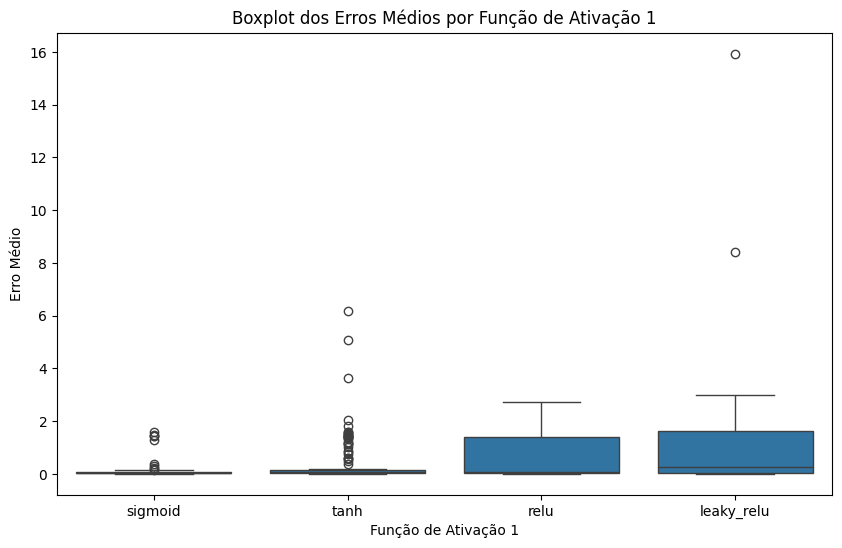

In [55]:
# Plotar boxplot dos erros
plt.figure(figsize=(10, 6))
sns.boxplot(x='Função de ativação 1', y='Erro médio', data=df)
plt.title('Boxplot dos Erros Médios por Função de Ativação 1')
plt.xlabel('Função de Ativação 1')
plt.ylabel('Erro Médio')
plt.show()

#### Curvas de Aprendizado 
As curvas de aprendizado mostram como os erros de treinamento e validação evoluem ao longo das épocas.
- Sobreajuste: Se o erro de treinamento é muito baixo enquanto o erro de validação é alto e crescente, o modelo está memorizando o conjunto de treinamento e não generaliza bem para novos dados.
- Subajuste: Se tanto o erro de treinamento quanto o de validação são altos, o modelo não está aprendendo adequadamente a partir dos dados de treinamento.

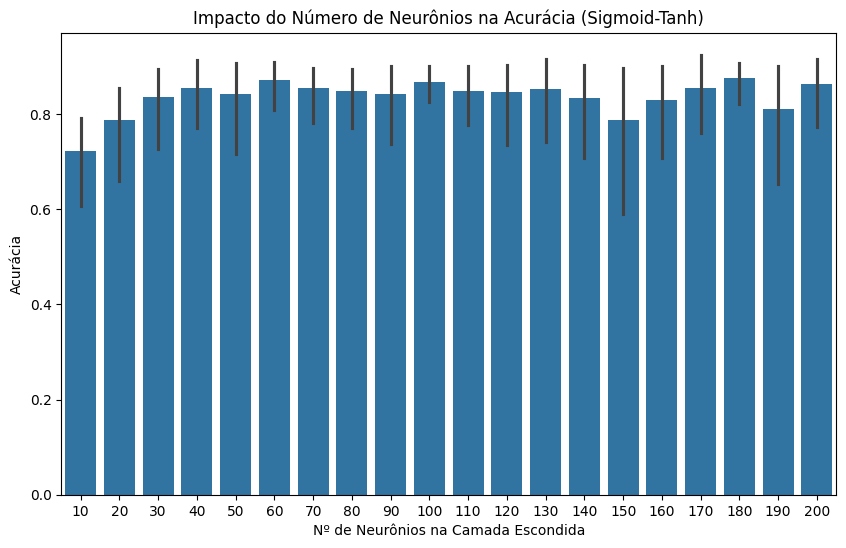

In [6]:
df_sigmoid = df[df['Função de ativação 1'] == 'sigmoid']
df_sigmoid_tanh = df_sigmoid[df_sigmoid['Função de ativação 2'] == 'tanh']

# Impacto do Número de Neurônios na Acurácia (Sigmoid-Tanh)
plt.figure(figsize=(10, 6))
sns.barplot(x='Nº de neuronios camada escondida', y='Acurácia', data=df_sigmoid_tanh)
plt.title('Impacto do Número de Neurônios na Acurácia (Sigmoid-Tanh)')
plt.xlabel('Nº de Neurônios na Camada Escondida')
plt.ylabel('Acurácia')
plt.show()


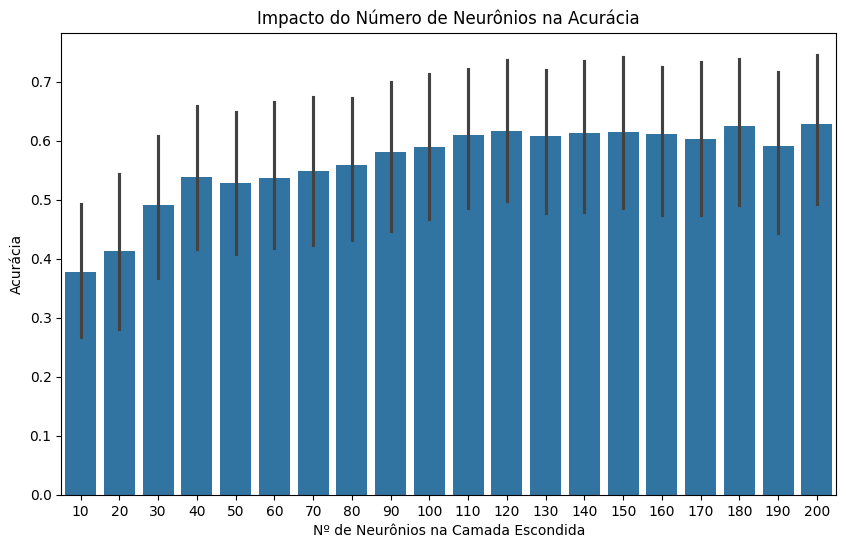

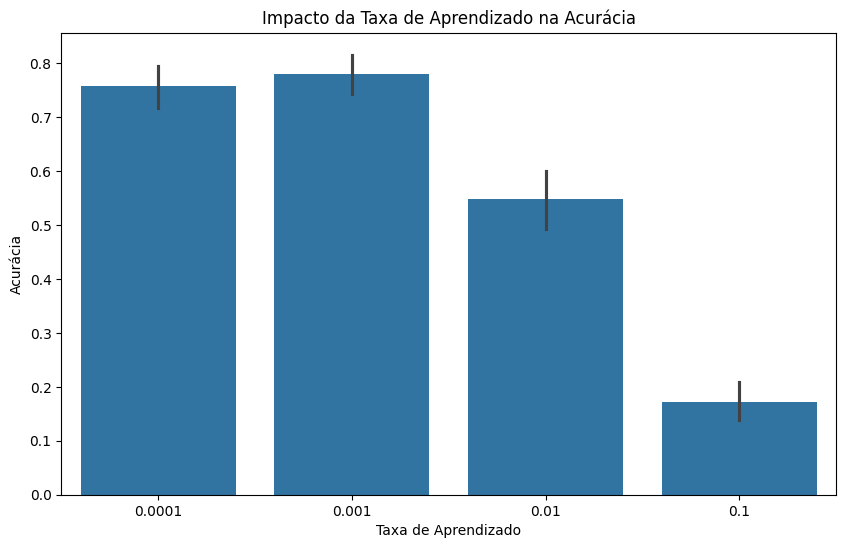

In [7]:
# Gráfico de Importância dos Hiperparâmetros (Sensibilidade)
import seaborn as sns
import matplotlib.pyplot as plt

# Analisando a importância do número de neurônios na camada escondida
plt.figure(figsize=(10, 6))
sns.barplot(x='Nº de neuronios camada escondida', y='Acurácia', data=df)
plt.title('Impacto do Número de Neurônios na Acurácia')
plt.xlabel('Nº de Neurônios na Camada Escondida')
plt.ylabel('Acurácia')
plt.show()

# Analisando a importância da taxa de aprendizado
plt.figure(figsize=(10, 6))
sns.barplot(x='Taxa de aprendizado', y='Acurácia', data=df)
plt.title('Impacto da Taxa de Aprendizado na Acurácia')
plt.xlabel('Taxa de Aprendizado')
plt.ylabel('Acurácia')
plt.show()


#### Gráficos de comparação da taxa de aprendizado com a acurácia e o erro médio da rede neural.

O gráfico mostra como a acurácia varia com a taxa de aprendizado. A taxa de aprendizado ideal maximiza a acurácia. Se a taxa de aprendizado for muito baixa, o modelo pode aprender muito lentamente e ficar preso em mínimos locais. Se for muito alta, o modelo pode se tornar instável e não convergir adequadamente.

 Além disso, ele ajuda a identificar a taxa de aprendizado que minimiza o erro médio. Idealmente, queremos uma taxa de aprendizado que resulte em um erro médio baixo, indicando que o modelo está fazendo previsões precisas.

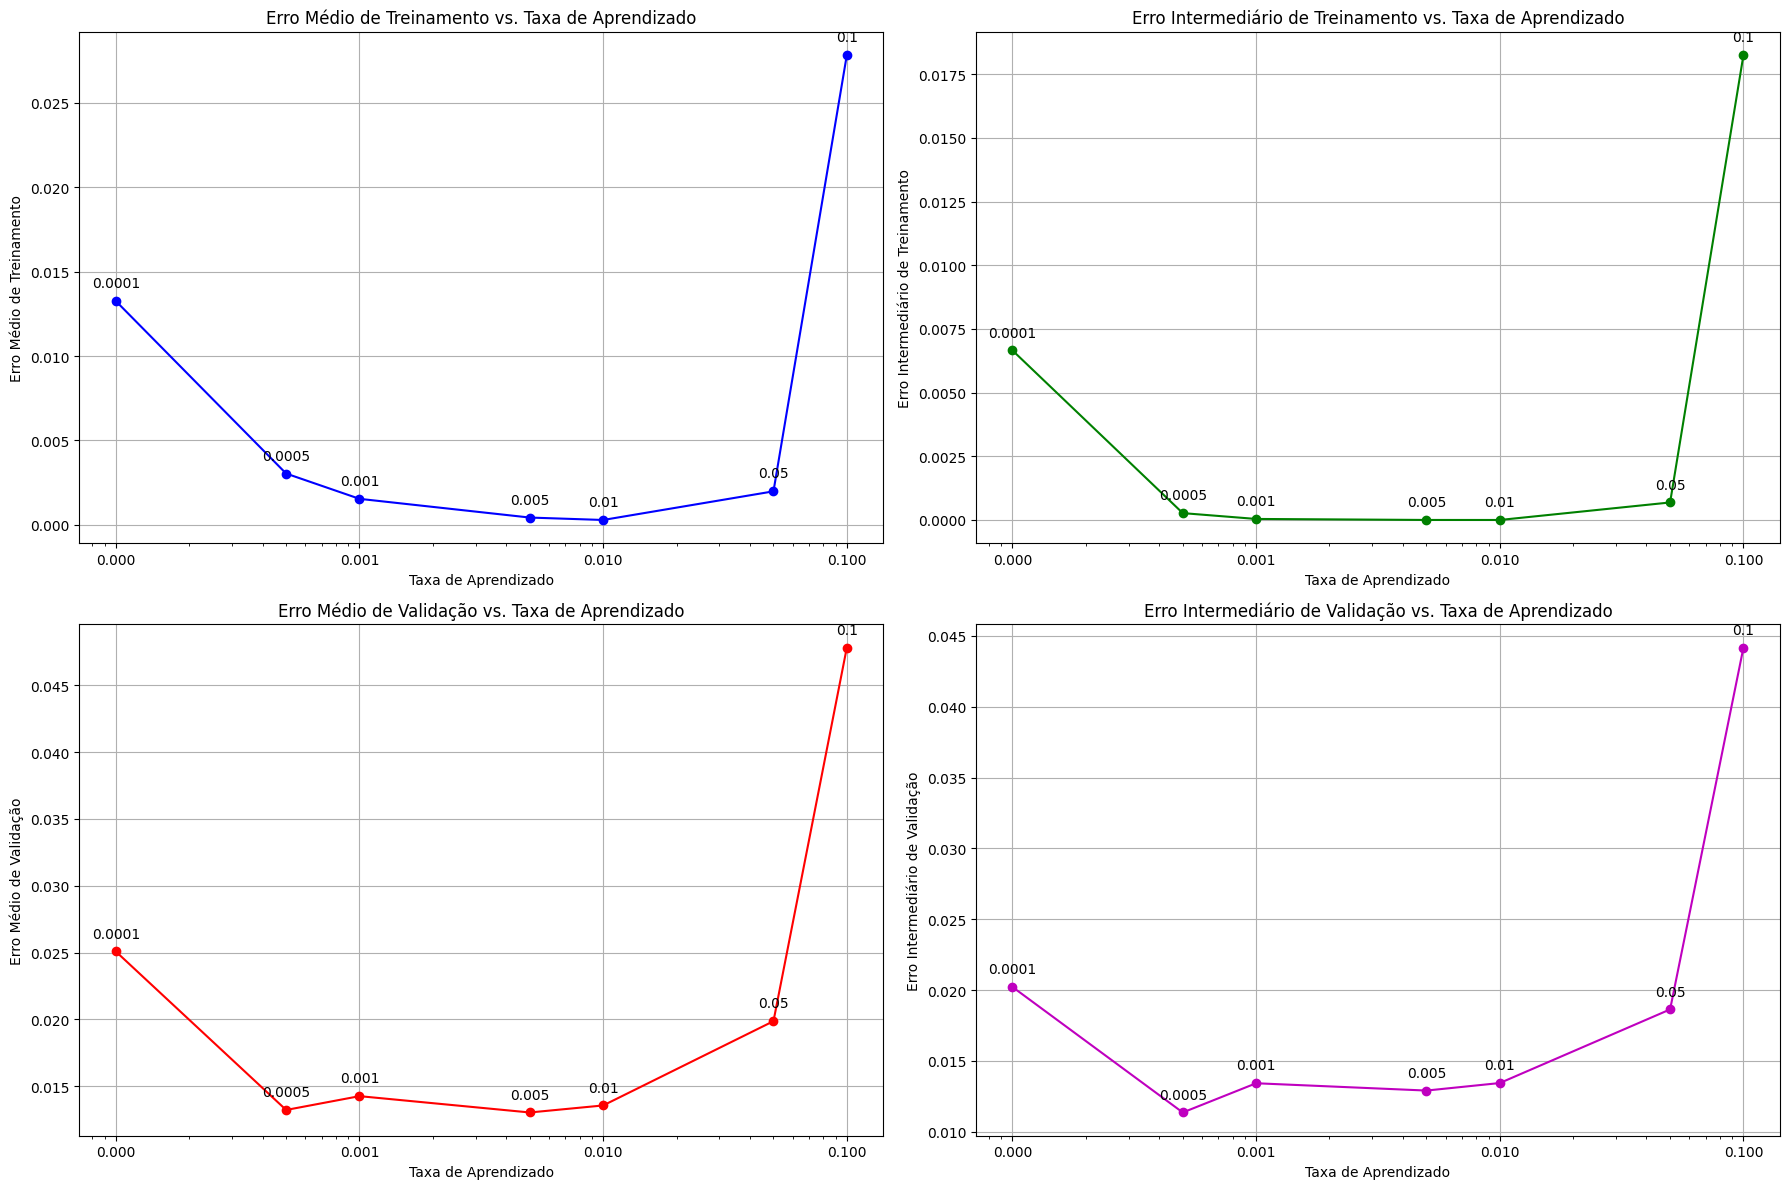

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

data = pd.read_csv("csvs/learning_rates.csv")
# Calculate the mean and an intermediate epoch (e.g., the middle epoch) errors for training and validation
def get_intermediate_and_mean_errors(errors_list):
    errors_list = eval(errors_list)
    mean_error = sum(errors_list) / len(errors_list)
    intermediate_error = errors_list[len(errors_list) // 2]
    return mean_error, intermediate_error

data['Erro médio treinamento'], data['Erro intermediário treinamento'] = zip(*data['Erros de treinamento por época'].map(get_intermediate_and_mean_errors))
data['Erro médio validação'], data['Erro intermediário validação'] = zip(*data['Erros de validação por época'].map(get_intermediate_and_mean_errors))

# Plotting the training and validation error curves for mean and intermediate epoch errors
plt.figure(figsize=(18, 12))

# Plot Mean Training Error
plt.subplot(2, 2, 1)
plt.plot(data['Taxa de aprendizado'], data['Erro médio treinamento'], marker='o', linestyle='-', color='b', label='Erro Médio de Treinamento')
plt.title('Erro Médio de Treinamento vs. Taxa de Aprendizado')
plt.xlabel('Taxa de Aprendizado')
plt.ylabel('Erro Médio de Treinamento')
plt.grid(True)
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
for i, txt in enumerate(data['Taxa de aprendizado']):
    plt.annotate(txt, (data['Taxa de aprendizado'][i], data['Erro médio treinamento'][i]), textcoords="offset points", xytext=(0,10), ha='center')

# Plot Intermediate Training Error
plt.subplot(2, 2, 2)
plt.plot(data['Taxa de aprendizado'], data['Erro intermediário treinamento'], marker='o', linestyle='-', color='g', label='Erro Intermediário de Treinamento')
plt.title('Erro Intermediário de Treinamento vs. Taxa de Aprendizado')
plt.xlabel('Taxa de Aprendizado')
plt.ylabel('Erro Intermediário de Treinamento')
plt.grid(True)
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
for i, txt in enumerate(data['Taxa de aprendizado']):
    plt.annotate(txt, (data['Taxa de aprendizado'][i], data['Erro intermediário treinamento'][i]), textcoords="offset points", xytext=(0,10), ha='center')

# Plot Mean Validation Error
plt.subplot(2, 2, 3)
plt.plot(data['Taxa de aprendizado'], data['Erro médio validação'], marker='o', linestyle='-', color='r', label='Erro Médio de Validação')
plt.title('Erro Médio de Validação vs. Taxa de Aprendizado')
plt.xlabel('Taxa de Aprendizado')
plt.ylabel('Erro Médio de Validação')
plt.grid(True)
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
for i, txt in enumerate(data['Taxa de aprendizado']):
    plt.annotate(txt, (data['Taxa de aprendizado'][i], data['Erro médio validação'][i]), textcoords="offset points", xytext=(0,10), ha='center')

# Plot Intermediate Validation Error
plt.subplot(2, 2, 4)
plt.plot(data['Taxa de aprendizado'], data['Erro intermediário validação'], marker='o', linestyle='-', color='m', label='Erro Intermediário de Validação')
plt.title('Erro Intermediário de Validação vs. Taxa de Aprendizado')
plt.xlabel('Taxa de Aprendizado')
plt.ylabel('Erro Intermediário de Validação')
plt.grid(True)
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
for i, txt in enumerate(data['Taxa de aprendizado']):
    plt.annotate(txt, (data['Taxa de aprendizado'][i], data['Erro intermediário validação'][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

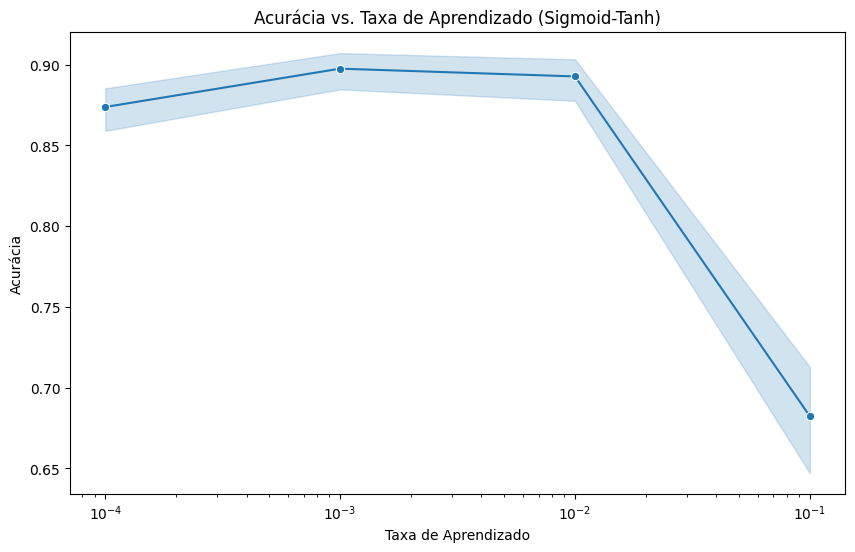

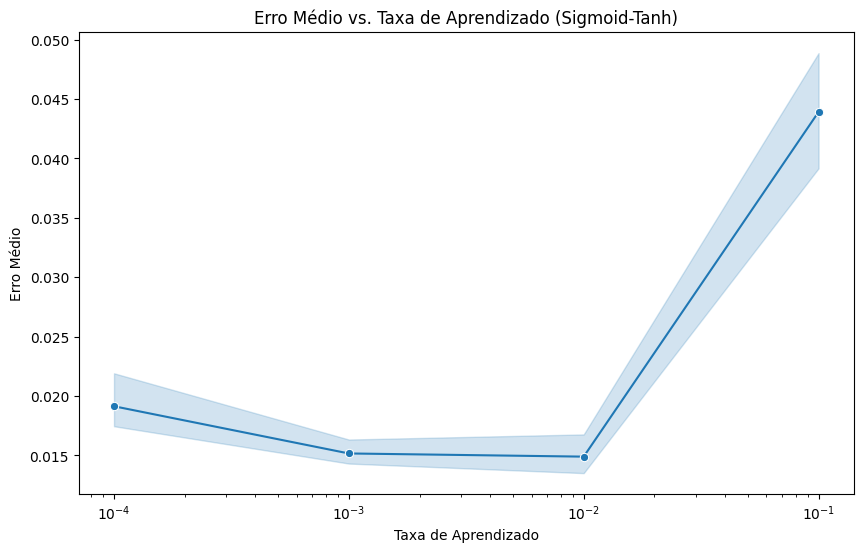

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotar a acurácia em relação à taxa de aprendizado
plt.figure(figsize=(10, 6))
sns.lineplot(x='Taxa de aprendizado', y='Acurácia', data=df_sigmoid_tanh, marker='o')
plt.title('Acurácia vs. Taxa de Aprendizado (Sigmoid-Tanh)')
plt.xlabel('Taxa de Aprendizado')
plt.ylabel('Acurácia')
plt.xscale('log')
plt.show()

# Plotar o erro médio em relação à taxa de aprendizado
plt.figure(figsize=(10, 6))
sns.lineplot(x='Taxa de aprendizado', y='Erro médio', data=df_sigmoid_tanh, marker='o')
plt.title('Erro Médio vs. Taxa de Aprendizado (Sigmoid-Tanh)')
plt.xlabel('Taxa de Aprendizado')
plt.ylabel('Erro Médio')
plt.xscale('log')
plt.show()


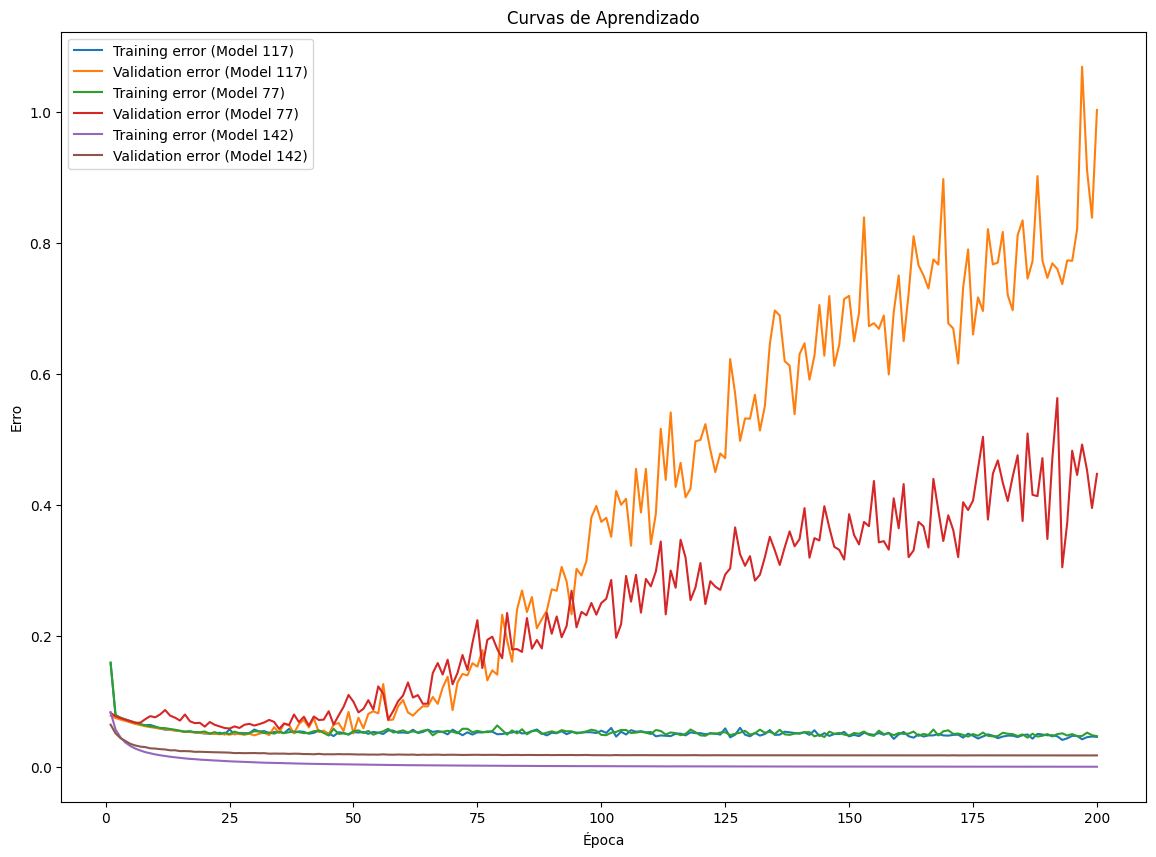

Taxa de aprendizado                                                            0.0001
Nº de neuronios camada escondida                                                  150
Função de ativação 1                                                             relu
Função de ativação 2                                                       leaky_relu
Acurácia                                                                     0.935897
Erro médio                                                                   1.121867
Desvio padrão de erro                                                        4.049226
Erros de treinamento por época      [0.15844990656675856, 0.07878923537751131, 0.0...
Erros de validação por época        [0.07825865243092658, 0.074663217558775, 0.072...
Name: 117, dtype: object


In [10]:
#### Gráficos que comparam a taxa de aprendizado com a acurácia e o erro médio da rede neural

best_models = df.nlargest(3, 'Acurácia')

# Plotar as curvas de aprendizado para os melhores modelos
plt.figure(figsize=(14, 10))
for idx, row in best_models.iterrows():
    train_errors = eval(row['Erros de treinamento por época'])
    val_errors = eval(row['Erros de validação por época'])
    epochs = range(1, len(train_errors) + 1)
    
    plt.plot(epochs, train_errors, label=f'Training error (Model {idx})')
    plt.plot(epochs, val_errors, label=f'Validation error (Model {idx})')

plt.xlabel('Época')
plt.ylabel('Erro')
plt.title('Curvas de Aprendizado')
plt.legend()
plt.show()

print(best_models.iloc[0])


In [17]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

#### Erros de Treinamento por Época para Diferentes Taxas de aprendizado

Permite comparar como diferentes taxas de aprendizado afetam o erro de treinamento ao longo das épocas

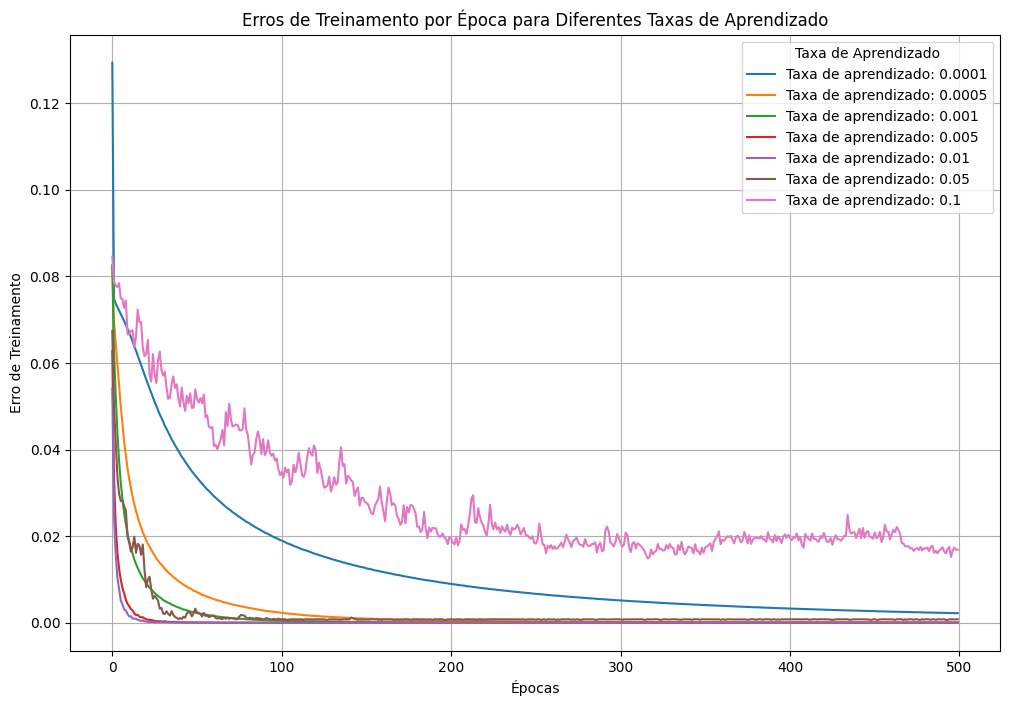

In [39]:
data = pd.read_csv("csvs/learning_rates.csv")
#Convert the string representations of lists to actual lists
data['Erros de treinamento por época'] = data['Erros de treinamento por época'].apply(eval)

#Plot the training errors for each learning rate
plt.figure(figsize=(12, 8))

for i, row in data.iterrows():
    plt.plot(row['Erros de treinamento por época'], label=f"Taxa de aprendizado: {row['Taxa de aprendizado']}")

plt.title('Erros de Treinamento por Época para Diferentes Taxas de Aprendizado')
plt.xlabel('Épocas')
plt.ylabel('Erro de Treinamento')
plt.legend(title='Taxa de Aprendizado')
plt.grid(True)
plt.show()


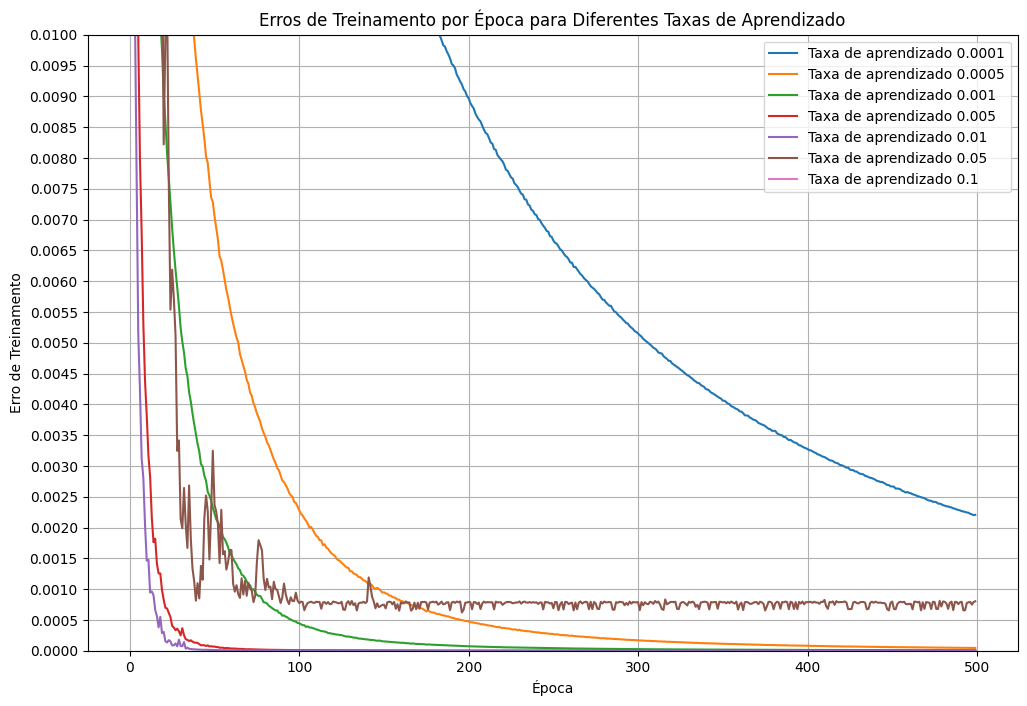

In [66]:
import numpy as np

data = pd.read_csv("csvs/learning_rates.csv")

# Extracting the training errors for each learning rate
learning_rates = data['Taxa de aprendizado']
training_errors = data['Erros de treinamento por época'].apply(eval)

# Plot training errors with a more granular y-axis scale starting from 0 and extended y-axis limit
plt.figure(figsize=(12, 8))

for i, rate in enumerate(learning_rates):
    plt.plot(training_errors[i], label=f'Taxa de aprendizado {rate}')

plt.title('Erros de Treinamento por Época para Diferentes Taxas de Aprendizado')
plt.xlabel('Época')
plt.ylabel('Erro de Treinamento')
plt.ylim(0.000, 0.010)  # Extend y-axis limit for less zoomed-in view

# Set y-axis with granular ticks but only label at intervals of 0.0005
y_ticks = np.arange(0.000, 0.0101, 0.0001)
plt.yticks(y_ticks)
plt.gca().set_yticks(np.arange(0.000, 0.0101, 0.0005), minor=False)

plt.legend()
plt.grid(True)
plt.show()


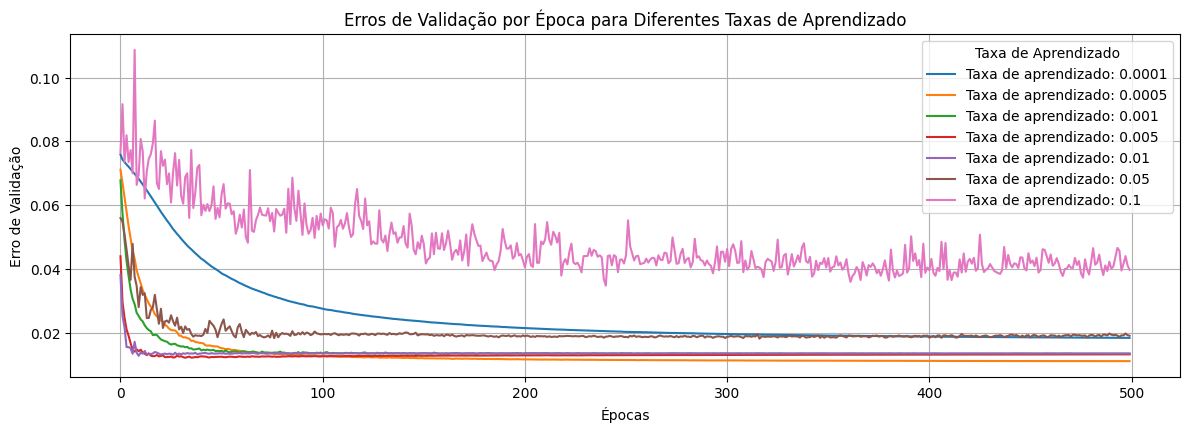

In [68]:
# Load the CSV file again to ensure we have the latest data
data = pd.read_csv("csvs/learning_rates.csv")

# Convert the string representations of lists to actual lists
data['Erros de treinamento por época'] = data['Erros de treinamento por época'].apply(eval)
data['Erros de validação por época'] = data['Erros de validação por época'].apply(eval)

# Plot validation errors by epoch for different learning rates
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 2)
for i, row in data.iterrows():
    plt.plot(row['Erros de validação por época'], label=f"Taxa de aprendizado: {row['Taxa de aprendizado']}")
plt.title('Erros de Validação por Época para Diferentes Taxas de Aprendizado')
plt.xlabel('Épocas')
plt.ylabel('Erro de Validação')
plt.legend(title='Taxa de Aprendizado')
plt.grid(True)

plt.tight_layout()
plt.show()

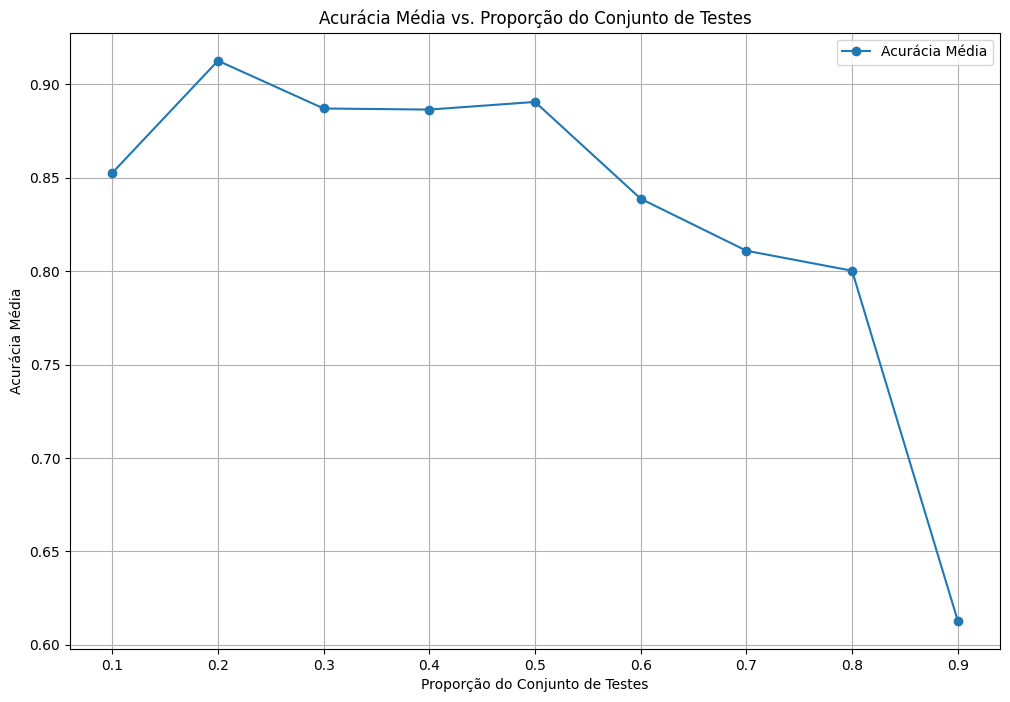

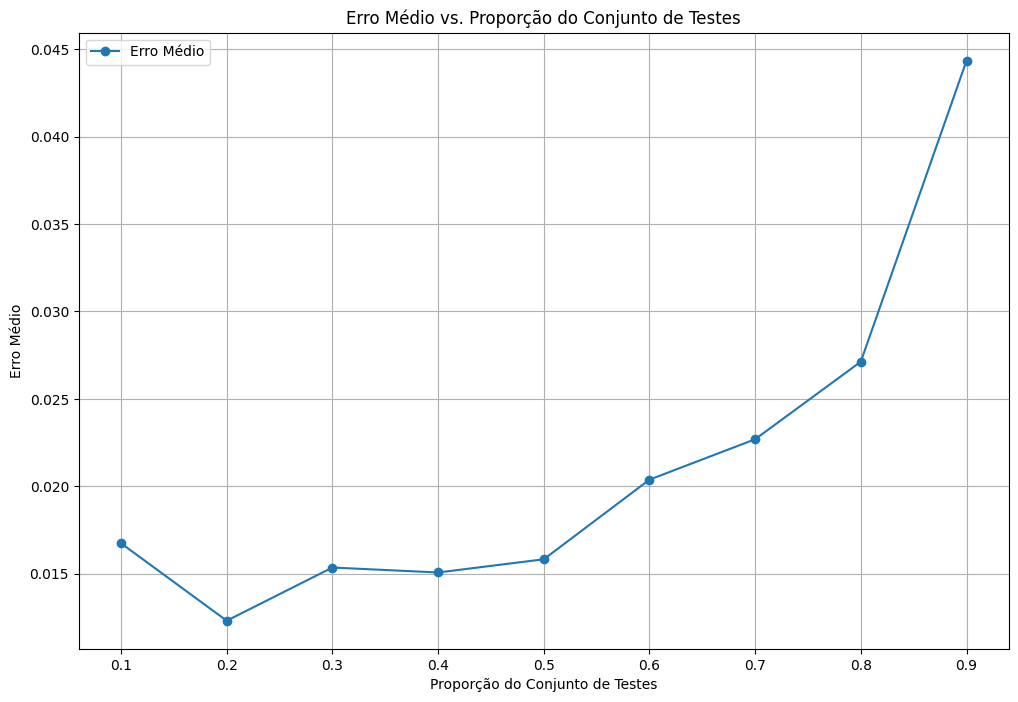

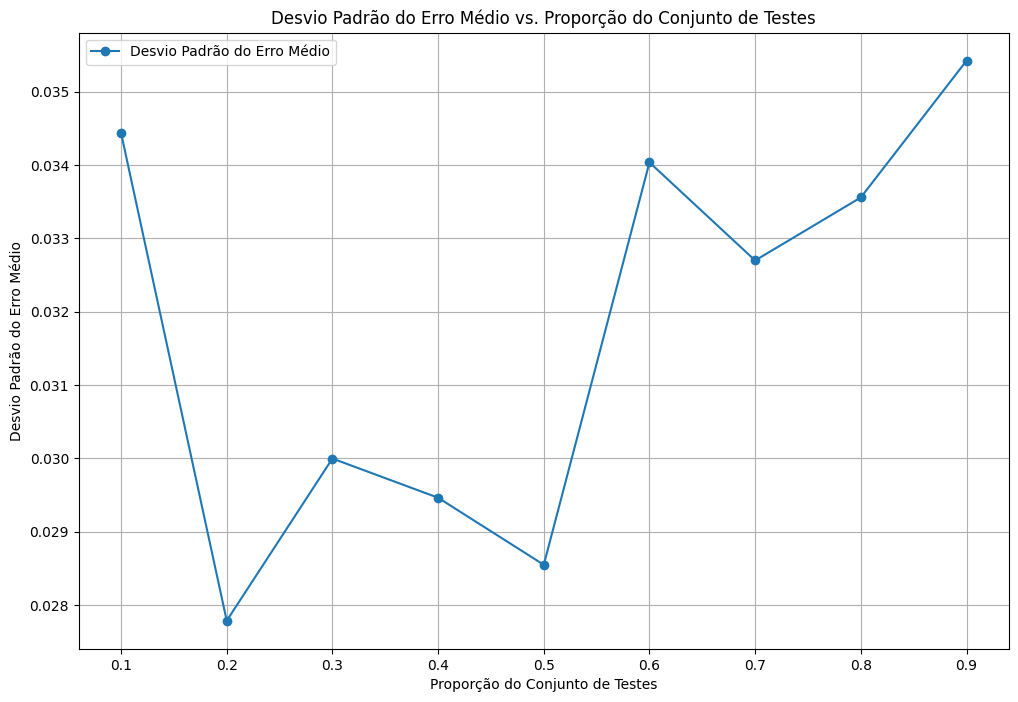

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
data = pd.read_csv("csvs/proporcao_conjunto_teste.csv")

# Selecionar apenas as colunas numéricas para calcular a média
numeric_columns = ['Acurácia', 'Erro médio', 'Desvio padrão de erro', 'Proporção conjunto de testes']
grouped_df = data[numeric_columns].groupby('Proporção conjunto de testes').mean().reset_index()

# Plotar a acurácia vs proporção do conjunto de testes
plt.figure(figsize=(12, 8))
plt.plot(grouped_df['Proporção conjunto de testes'], grouped_df['Acurácia'], 
         'o-', label='Acurácia Média')
plt.title('Acurácia Média vs. Proporção do Conjunto de Testes')
plt.xlabel('Proporção do Conjunto de Testes')
plt.ylabel('Acurácia Média')
plt.grid(True)
plt.legend()
plt.show()

# Plotar o erro médio vs proporção do conjunto de testes
plt.figure(figsize=(12, 8))
plt.plot(grouped_df['Proporção conjunto de testes'], grouped_df['Erro médio'], 
         'o-', label='Erro Médio')
plt.title('Erro Médio vs. Proporção do Conjunto de Testes')
plt.xlabel('Proporção do Conjunto de Testes')
plt.ylabel('Erro Médio')
plt.grid(True)
plt.legend()
plt.show()

# Plotar o desvio padrão do erro médio vs proporção do conjunto de testes
plt.figure(figsize=(12, 8))
plt.plot(grouped_df['Proporção conjunto de testes'], grouped_df['Desvio padrão de erro'], 
         'o-', label='Desvio Padrão do Erro Médio')
plt.title('Desvio Padrão do Erro Médio vs. Proporção do Conjunto de Testes')
plt.xlabel('Proporção do Conjunto de Testes')
plt.ylabel('Desvio Padrão do Erro Médio')
plt.grid(True)
plt.legend()
plt.show()

#### Gráfico analisando o desempenho Com e sem Momentum, com e sem Xavier e sem o uso de nenhum deles


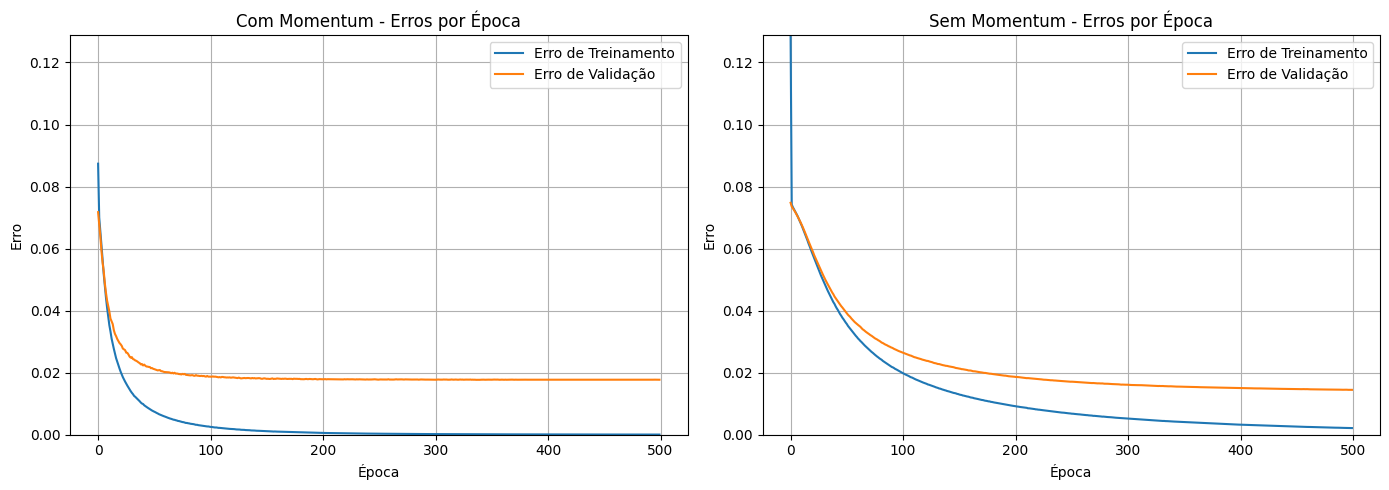

In [101]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# Load the datasets
com_momentum = pd.read_csv('csvs/com_momentum.csv')
sem_momentum = pd.read_csv('csvs/sem_momentum.csv')

# Convert the string lists into actual lists
com_momentum['Erros de treinamento por época'] = com_momentum['Erros de treinamento por época'].apply(ast.literal_eval)
com_momentum['Erros de validação por época'] = com_momentum['Erros de validação por época'].apply(ast.literal_eval)
sem_momentum['Erros de treinamento por época'] = sem_momentum['Erros de treinamento por época'].apply(ast.literal_eval)
sem_momentum['Erros de validação por época'] = sem_momentum['Erros de validação por época'].apply(ast.literal_eval)

# Calculate common y-axis limits
max_error = max(
    max(com_momentum.loc[0, 'Erros de treinamento por época']),
    max(com_momentum.loc[0, 'Erros de validação por época']),
    max(sem_momentum.loc[0, 'Erros de treinamento por época']),
    max(sem_momentum.loc[0, 'Erros de validação por época'])
)

min_error = min(
    min(com_momentum.loc[0, 'Erros de treinamento por época']),
    min(com_momentum.loc[0, 'Erros de validação por época']),
    min(sem_momentum.loc[0, 'Erros de treinamento por época']),
    min(sem_momentum.loc[0, 'Erros de validação por época'])
)

y_ticks = [i / 100 for i in range(int(min_error*100), int(max_error*100) + 2, 2)]

# Plot training and validation errors side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot for the model with momentum
axes[0].plot(com_momentum.loc[0, 'Erros de treinamento por época'], label='Erro de Treinamento')
axes[0].plot(com_momentum.loc[0, 'Erros de validação por época'], label='Erro de Validação')
axes[0].set_title('Com Momentum - Erros por Época')
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Erro')
axes[0].set_ylim([min_error, max_error])
axes[0].set_yticks(y_ticks)
axes[0].grid(True)
axes[0].legend()
plt.grid(True)

# Plot for the model without momentum
axes[1].plot(sem_momentum.loc[0, 'Erros de treinamento por época'], label='Erro de Treinamento')
axes[1].plot(sem_momentum.loc[0, 'Erros de validação por época'], label='Erro de Validação')
axes[1].set_title('Sem Momentum - Erros por Época')
axes[1].set_xlabel('Época')
axes[1].set_ylabel('Erro')
axes[1].set_ylim([min_error, max_error])
axes[1].set_yticks(y_ticks)
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

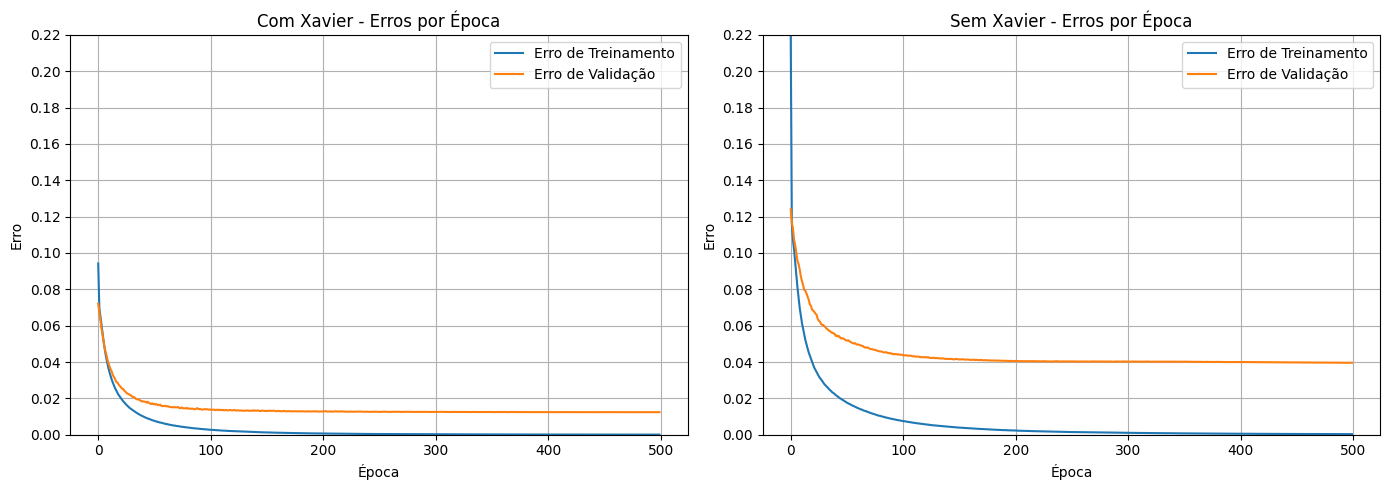

In [99]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# Load the datasets
com_xavier = pd.read_csv('csvs/com_xavier.csv')
sem_xavier = pd.read_csv('csvs/sem_xavier.csv')

# Convert the string lists into actual lists
com_xavier['Erros de treinamento por época'] = com_xavier['Erros de treinamento por época'].apply(ast.literal_eval)
com_xavier['Erros de validação por época'] = com_xavier['Erros de validação por época'].apply(ast.literal_eval)
sem_xavier['Erros de treinamento por época'] = sem_xavier['Erros de treinamento por época'].apply(ast.literal_eval)
sem_xavier['Erros de validação por época'] = sem_xavier['Erros de validação por época'].apply(ast.literal_eval)

# Calculate common y-axis limits for the new datasets
max_error_xavier = max(
    max(com_xavier.loc[0, 'Erros de treinamento por época']),
    max(com_xavier.loc[0, 'Erros de validação por época']),
    max(sem_xavier.loc[0, 'Erros de treinamento por época']),
    max(sem_xavier.loc[0, 'Erros de validação por época'])
)

min_error_xavier = min(
    min(com_xavier.loc[0, 'Erros de treinamento por época']),
    min(com_xavier.loc[0, 'Erros de validação por época']),
    min(sem_xavier.loc[0, 'Erros de treinamento por época']),
    min(sem_xavier.loc[0, 'Erros de validação por época'])
)

# Set y-axis ticks for the new datasets
y_ticks_xavier = [i / 100 for i in range(int(min_error_xavier*100), int(max_error_xavier*100) + 2, 2)]

# Plot training and validation errors side by side with specified y-axis ticks for the new datasets
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot for the model with Xavier initialization
axes[0].plot(com_xavier.loc[0, 'Erros de treinamento por época'], label='Erro de Treinamento')
axes[0].plot(com_xavier.loc[0, 'Erros de validação por época'], label='Erro de Validação')
axes[0].set_title('Com Xavier - Erros por Época')
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Erro')
axes[0].set_ylim([min_error_xavier, max_error_xavier])
axes[0].set_yticks(y_ticks_xavier)
axes[0].legend()
axes[0].grid(True)  # Enable grid

# Plot for the model without Xavier initialization
axes[1].plot(sem_xavier.loc[0, 'Erros de treinamento por época'], label='Erro de Treinamento')
axes[1].plot(sem_xavier.loc[0, 'Erros de validação por época'], label='Erro de Validação')
axes[1].set_title('Sem Xavier - Erros por Época')
axes[1].set_xlabel('Época')
axes[1].set_ylabel('Erro')
axes[1].set_ylim([min_error_xavier, max_error_xavier])
axes[1].set_yticks(y_ticks_xavier)
axes[1].legend()
axes[1].grid(True)  # Enable grid

plt.tight_layout()
plt.show()

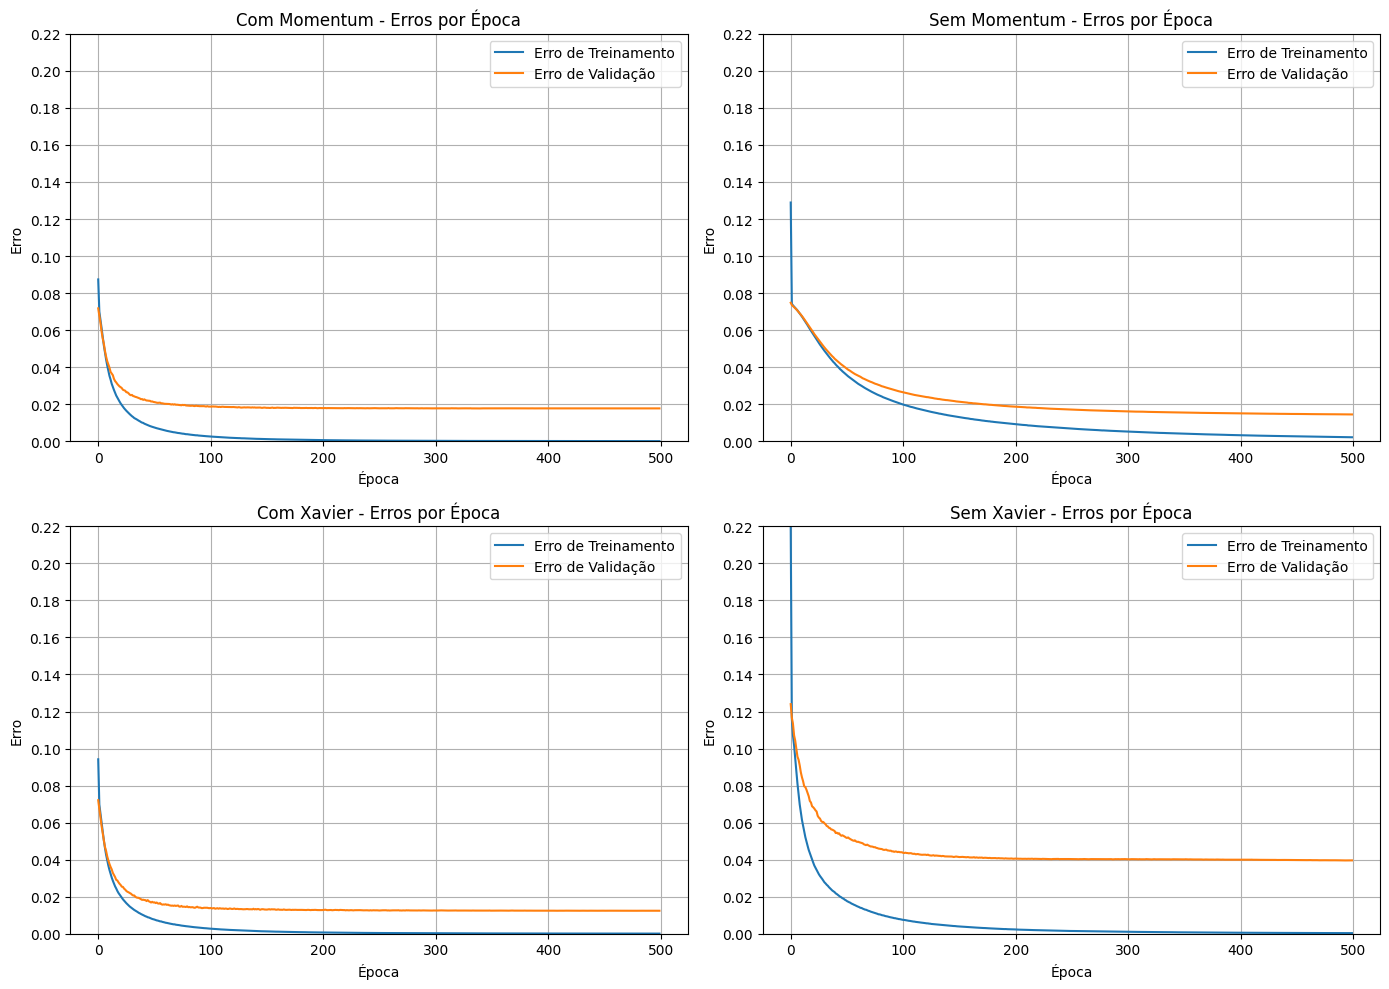

In [100]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# Load the datasets
com_momentum = pd.read_csv('csvs/com_momentum.csv')
sem_momentum = pd.read_csv('csvs/sem_momentum.csv')
com_xavier = pd.read_csv('csvs/com_xavier.csv')
sem_xavier = pd.read_csv('csvs/sem_xavier.csv')

# Convert the string lists into actual lists
com_momentum['Erros de treinamento por época'] = com_momentum['Erros de treinamento por época'].apply(ast.literal_eval)
com_momentum['Erros de validação por época'] = com_momentum['Erros de validação por época'].apply(ast.literal_eval)
sem_momentum['Erros de treinamento por época'] = sem_momentum['Erros de treinamento por época'].apply(ast.literal_eval)
sem_momentum['Erros de validação por época'] = sem_momentum['Erros de validação por época'].apply(ast.literal_eval)
com_xavier['Erros de treinamento por época'] = com_xavier['Erros de treinamento por época'].apply(ast.literal_eval)
com_xavier['Erros de validação por época'] = com_xavier['Erros de validação por época'].apply(ast.literal_eval)
sem_xavier['Erros de treinamento por época'] = sem_xavier['Erros de treinamento por época'].apply(ast.literal_eval)
sem_xavier['Erros de validação por época'] = sem_xavier['Erros de validação por época'].apply(ast.literal_eval)

# Calculate common y-axis limits for all datasets
all_max_error = max(
    max(com_momentum.loc[0, 'Erros de treinamento por época']),
    max(com_momentum.loc[0, 'Erros de validação por época']),
    max(sem_momentum.loc[0, 'Erros de treinamento por época']),
    max(sem_momentum.loc[0, 'Erros de validação por época']),
    max(com_xavier.loc[0, 'Erros de treinamento por época']),
    max(com_xavier.loc[0, 'Erros de validação por época']),
    max(sem_xavier.loc[0, 'Erros de treinamento por época']),
    max(sem_xavier.loc[0, 'Erros de validação por época'])
)

all_min_error = min(
    min(com_momentum.loc[0, 'Erros de treinamento por época']),
    min(com_momentum.loc[0, 'Erros de validação por época']),
    min(sem_momentum.loc[0, 'Erros de treinamento por época']),
    min(sem_momentum.loc[0, 'Erros de validação por época']),
    min(com_xavier.loc[0, 'Erros de treinamento por época']),
    min(com_xavier.loc[0, 'Erros de validação por época']),
    min(sem_xavier.loc[0, 'Erros de treinamento por época']),
    min(sem_xavier.loc[0, 'Erros de validação por época'])
)

# Set y-axis ticks for consistency across all models
all_y_ticks = [i / 100 for i in range(int(all_min_error*100), int(all_max_error*100) + 2, 2)]

# Plot training and validation errors side by side for all models
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot for the model with momentum
axes[0, 0].plot(com_momentum.loc[0, 'Erros de treinamento por época'], label='Erro de Treinamento')
axes[0, 0].plot(com_momentum.loc[0, 'Erros de validação por época'], label='Erro de Validação')
axes[0, 0].set_title('Com Momentum - Erros por Época')
axes[0, 0].set_xlabel('Época')
axes[0, 0].set_ylabel('Erro')
axes[0, 0].set_ylim([all_min_error, all_max_error])
axes[0, 0].set_yticks(all_y_ticks)
axes[0, 0].legend()
axes[0, 0].grid(True)  # Enable grid

# Plot for the model without momentum
axes[0, 1].plot(sem_momentum.loc[0, 'Erros de treinamento por época'], label='Erro de Treinamento')
axes[0, 1].plot(sem_momentum.loc[0, 'Erros de validação por época'], label='Erro de Validação')
axes[0, 1].set_title('Sem Momentum - Erros por Época')
axes[0, 1].set_xlabel('Época')
axes[0, 1].set_ylabel('Erro')
axes[0, 1].set_ylim([all_min_error, all_max_error])
axes[0, 1].set_yticks(all_y_ticks)
axes[0, 1].legend()
axes[0, 1].grid(True)  # Enable grid

# Plot for the model with Xavier initialization
axes[1, 0].plot(com_xavier.loc[0, 'Erros de treinamento por época'], label='Erro de Treinamento')
axes[1, 0].plot(com_xavier.loc[0, 'Erros de validação por época'], label='Erro de Validação')
axes[1, 0].set_title('Com Xavier - Erros por Época')
axes[1, 0].set_xlabel('Época')
axes[1, 0].set_ylabel('Erro')
axes[1, 0].set_ylim([all_min_error, all_max_error])
axes[1, 0].set_yticks(all_y_ticks)
axes[1, 0].legend()
axes[1, 0].grid(True)  # Enable grid

# Plot for the model without Xavier initialization
axes[1, 1].plot(sem_xavier.loc[0, 'Erros de treinamento por época'], label='Erro de Treinamento')
axes[1, 1].plot(sem_xavier.loc[0, 'Erros de validação por época'], label='Erro de Validação')
axes[1, 1].set_title('Sem Xavier - Erros por Época')
axes[1, 1].set_xlabel('Época')
axes[1, 1].set_ylabel('Erro')
axes[1, 1].set_ylim([all_min_error, all_max_error])
axes[1, 1].set_yticks(all_y_ticks)
axes[1, 1].legend()
axes[1, 1].grid(True)  # Enable grid

plt.tight_layout()
plt.show()

SEM NADA E COM MOMENTUM

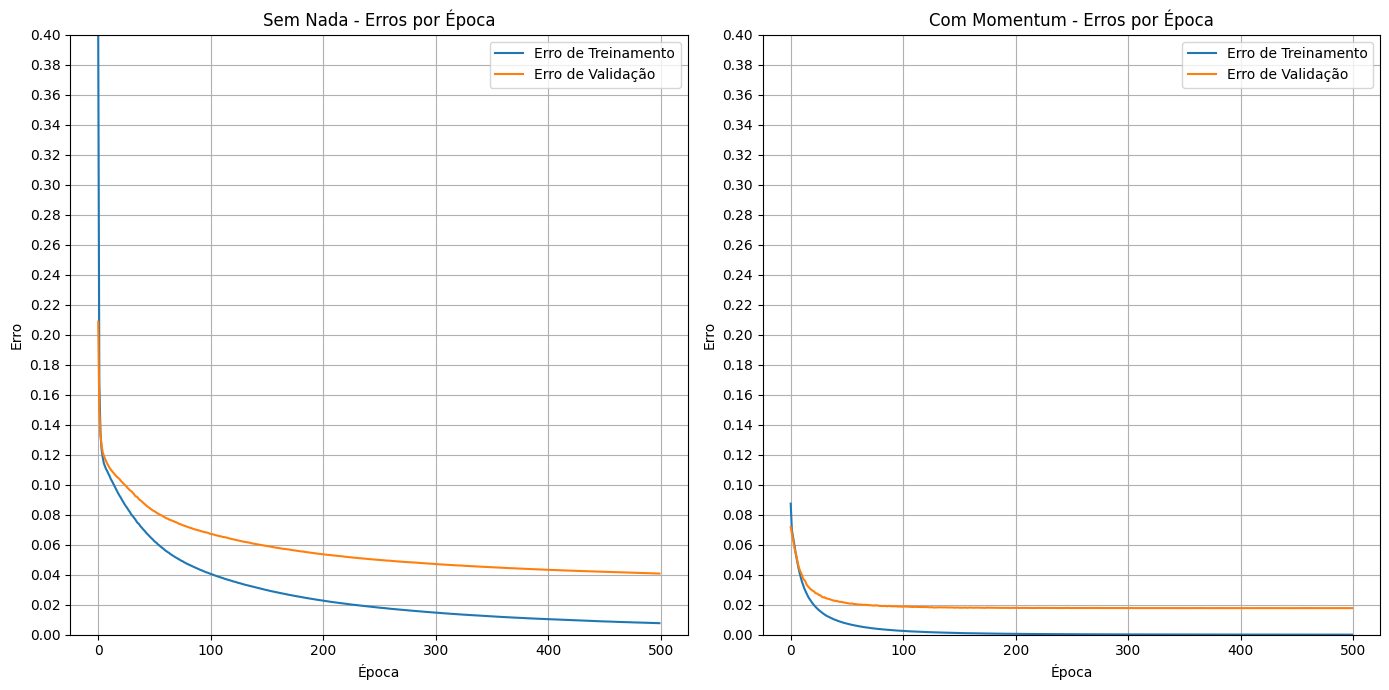

In [103]:
# Plot training and validation errors for the two specified models in a single row

# Plot training and validation errors side by side for the specified models
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot for the model with no special initialization or momentum
axes[0].plot(sem_nada.loc[0, 'Erros de treinamento por época'], label='Erro de Treinamento')
axes[0].plot(sem_nada.loc[0, 'Erros de validação por época'], label='Erro de Validação')
axes[0].set_title('Sem Nada - Erros por Época')
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Erro')
axes[0].set_ylim([all_min_error, all_max_error])
axes[0].set_yticks(all_y_ticks)
axes[0].legend()
axes[0].grid(True)  # Enable grid

# Plot for the model with momentum
axes[1].plot(com_momentum.loc[0, 'Erros de treinamento por época'], label='Erro de Treinamento')
axes[1].plot(com_momentum.loc[0, 'Erros de validação por época'], label='Erro de Validação')
axes[1].set_title('Com Momentum - Erros por Época')
axes[1].set_xlabel('Época')
axes[1].set_ylabel('Erro')
axes[1].set_ylim([all_min_error, all_max_error])
axes[1].set_yticks(all_y_ticks)
axes[1].legend()
axes[1].grid(True)  # Enable grid

plt.tight_layout()
plt.show()

SEM NADA E COM XAVIER

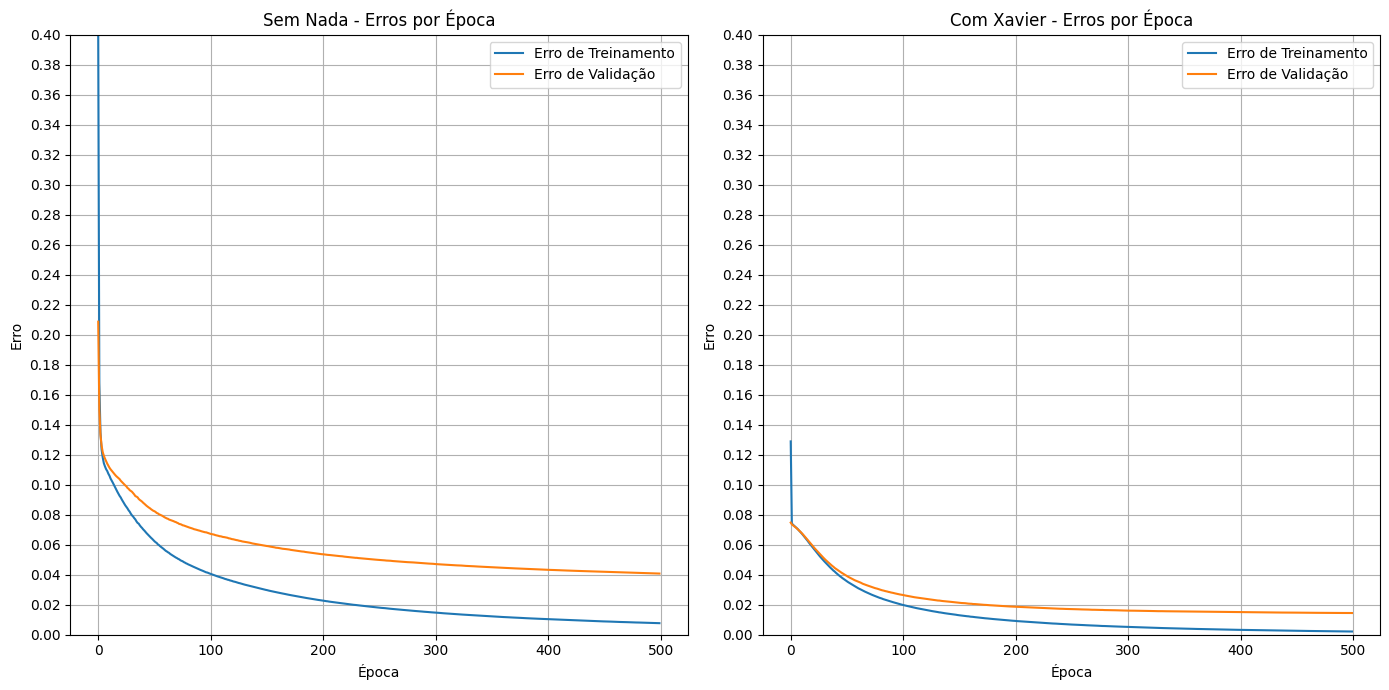

In [104]:
# Plot training and validation errors for the two specified models in a single row

# Plot training and validation errors side by side for the specified models
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot for the model with no special initialization or momentum
axes[0].plot(sem_nada.loc[0, 'Erros de treinamento por época'], label='Erro de Treinamento')
axes[0].plot(sem_nada.loc[0, 'Erros de validação por época'], label='Erro de Validação')
axes[0].set_title('Sem Nada - Erros por Época')
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Erro')
axes[0].set_ylim([all_min_error, all_max_error])
axes[0].set_yticks(all_y_ticks)
axes[0].legend()
axes[0].grid(True)  # Enable grid

# Plot for the model with Xavier initialization
axes[1].plot(com_xavier.loc[0, 'Erros de treinamento por época'], label='Erro de Treinamento')
axes[1].plot(com_xavier.loc[0, 'Erros de validação por época'], label='Erro de Validação')
axes[1].set_title('Com Xavier - Erros por Época')
axes[1].set_xlabel('Época')
axes[1].set_ylabel('Erro')
axes[1].set_ylim([all_min_error, all_max_error])
axes[1].set_yticks(all_y_ticks)
axes[1].legend()
axes[1].grid(True)  # Enable grid

plt.tight_layout()
plt.show()

SEM NADA E COM MOMENTUM

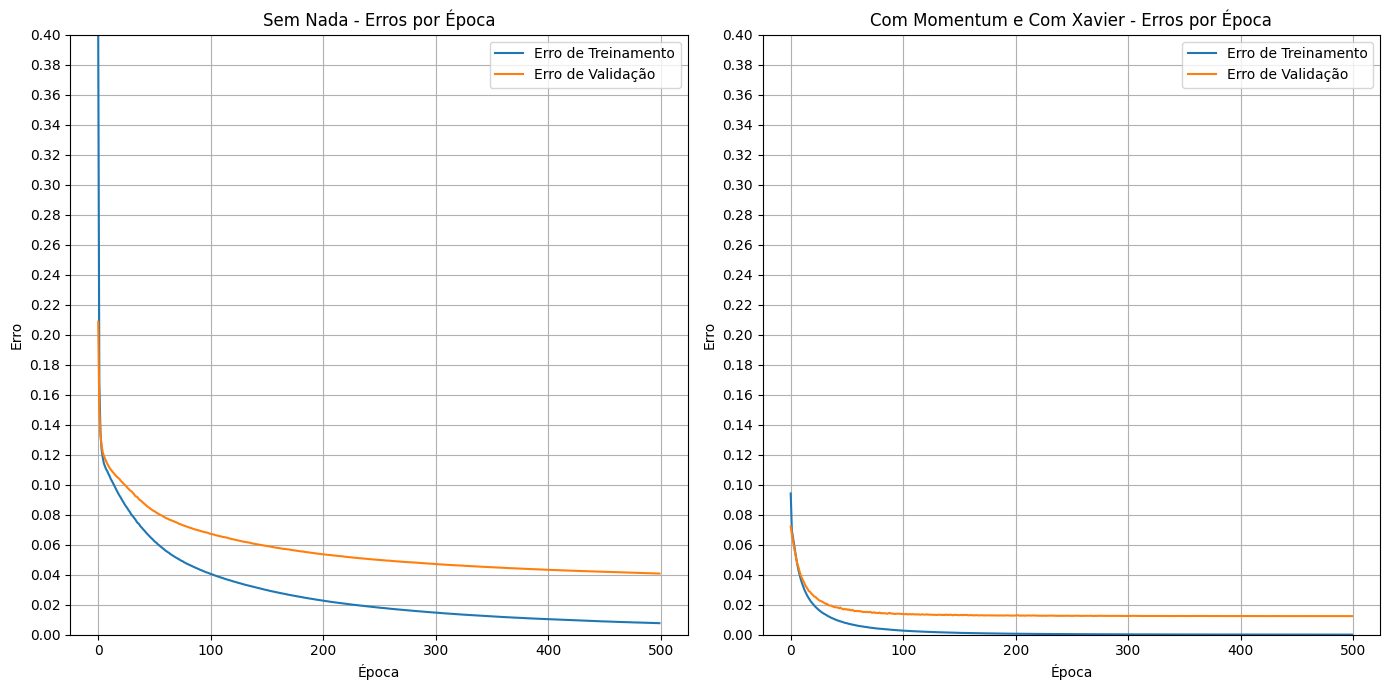

In [105]:
# Plot training and validation errors for the two specified models in a single row

# Plot training and validation errors side by side for the specified models
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot for the model with no special initialization or momentum
axes[0].plot(sem_nada.loc[0, 'Erros de treinamento por época'], label='Erro de Treinamento')
axes[0].plot(sem_nada.loc[0, 'Erros de validação por época'], label='Erro de Validação')
axes[0].set_title('Sem Nada - Erros por Época')
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Erro')
axes[0].set_ylim([all_min_error, all_max_error])
axes[0].set_yticks(all_y_ticks)
axes[0].legend()
axes[0].grid(True)  # Enable grid

# Plot for the model with both momentum and Xavier initialization
axes[1].plot(com_dois.loc[0, 'Erros de treinamento por época'], label='Erro de Treinamento')
axes[1].plot(com_dois.loc[0, 'Erros de validação por época'], label='Erro de Validação')
axes[1].set_title('Com Momentum e Com Xavier - Erros por Época')
axes[1].set_xlabel('Época')
axes[1].set_ylabel('Erro')
axes[1].set_ylim([all_min_error, all_max_error])
axes[1].set_yticks(all_y_ticks)
axes[1].legend()
axes[1].grid(True)  # Enable grid

plt.tight_layout()
plt.show()

SEM NADA E COM OS DOIS

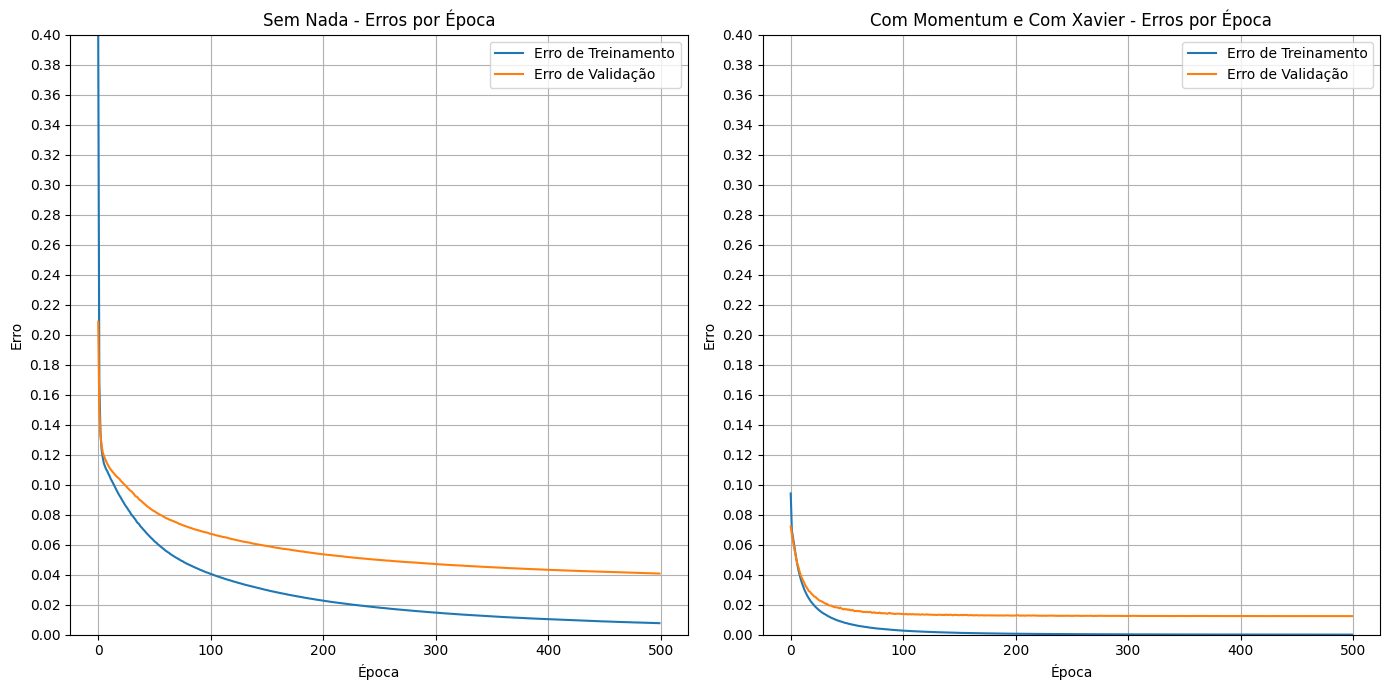

In [106]:
# Plot training and validation errors for the two specified models in a single row

# Plot training and validation errors side by side for the specified models
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot for the model with no special initialization or momentum
axes[0].plot(sem_nada.loc[0, 'Erros de treinamento por época'], label='Erro de Treinamento')
axes[0].plot(sem_nada.loc[0, 'Erros de validação por época'], label='Erro de Validação')
axes[0].set_title('Sem Nada - Erros por Época')
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Erro')
axes[0].set_ylim([all_min_error, all_max_error])
axes[0].set_yticks(all_y_ticks)
axes[0].legend()
axes[0].grid(True)  # Enable grid

# Plot for the model with both momentum and Xavier initialization
axes[1].plot(com_dois.loc[0, 'Erros de treinamento por época'], label='Erro de Treinamento')
axes[1].plot(com_dois.loc[0, 'Erros de validação por época'], label='Erro de Validação')
axes[1].set_title('Com Momentum e Com Xavier - Erros por Época')
axes[1].set_xlabel('Época')
axes[1].set_ylabel('Erro')
axes[1].set_ylim([all_min_error, all_max_error])
axes[1].set_yticks(all_y_ticks)
axes[1].legend()
axes[1].grid(True)  # Enable grid

plt.tight_layout()
plt.show()

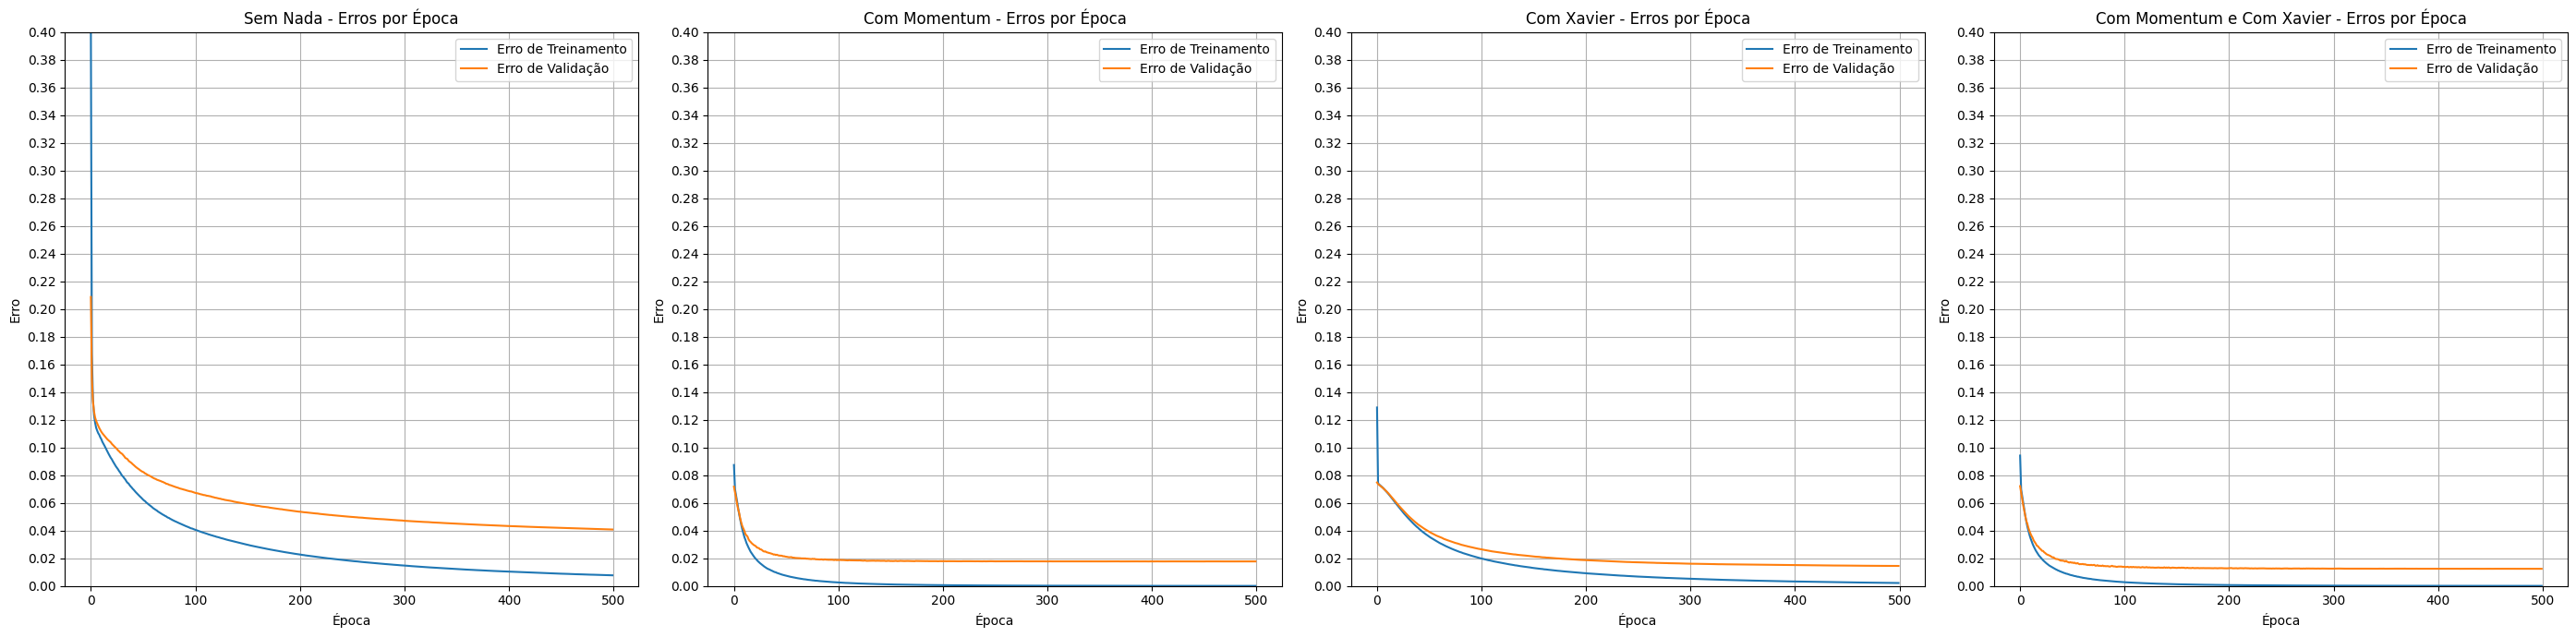

In [107]:
# Load the datasets again for clarity with new filenames
sem_nada = pd.read_csv("csvs/sem_nada.csv")
com_momentum = pd.read_csv("csvs/com_momentum.csv")
com_xavier = pd.read_csv("csvs/com_xavier.csv")
com_dois = pd.read_csv("csvs/com_dois.csv")

# Convert the string lists into actual lists
sem_nada['Erros de treinamento por época'] = sem_nada['Erros de treinamento por época'].apply(ast.literal_eval)
sem_nada['Erros de validação por época'] = sem_nada['Erros de validação por época'].apply(ast.literal_eval)
com_momentum['Erros de treinamento por época'] = com_momentum['Erros de treinamento por época'].apply(ast.literal_eval)
com_momentum['Erros de validação por época'] = com_momentum['Erros de validação por época'].apply(ast.literal_eval)
com_xavier['Erros de treinamento por época'] = com_xavier['Erros de treinamento por época'].apply(ast.literal_eval)
com_xavier['Erros de validação por época'] = com_xavier['Erros de validação por época'].apply(ast.literal_eval)
com_dois['Erros de treinamento por época'] = com_dois['Erros de treinamento por época'].apply(ast.literal_eval)
com_dois['Erros de validação por época'] = com_dois['Erros de validação por época'].apply(ast.literal_eval)

# Calculate common y-axis limits including the new dataset
all_max_error = max(
    max(sem_nada.loc[0, 'Erros de treinamento por época']),
    max(sem_nada.loc[0, 'Erros de validação por época']),
    max(com_momentum.loc[0, 'Erros de treinamento por época']),
    max(com_momentum.loc[0, 'Erros de validação por época']),
    max(com_xavier.loc[0, 'Erros de treinamento por época']),
    max(com_xavier.loc[0, 'Erros de validação por época']),
    max(com_dois.loc[0, 'Erros de treinamento por época']),
    max(com_dois.loc[0, 'Erros de validação por época'])
)

all_min_error = min(
    min(sem_nada.loc[0, 'Erros de treinamento por época']),
    min(sem_nada.loc[0, 'Erros de validação por época']),
    min(com_momentum.loc[0, 'Erros de treinamento por época']),
    min(com_momentum.loc[0, 'Erros de validação por época']),
    min(com_xavier.loc[0, 'Erros de treinamento por época']),
    min(com_xavier.loc[0, 'Erros de validação por época']),
    min(com_dois.loc[0, 'Erros de treinamento por época']),
    min(com_dois.loc[0, 'Erros de validação por época'])
)

# Set y-axis ticks for consistency across all models
all_y_ticks = [i / 100 for i in range(int(all_min_error*100), int(all_max_error*100) + 2, 2)]

# Plot training and validation errors side by side for all models in the specified order
fig, axes = plt.subplots(1, 4, figsize=(28, 7))

# Plot for the model with no special initialization or momentum
axes[0].plot(sem_nada.loc[0, 'Erros de treinamento por época'], label='Erro de Treinamento')
axes[0].plot(sem_nada.loc[0, 'Erros de validação por época'], label='Erro de Validação')
axes[0].set_title('Sem Nada - Erros por Época')
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Erro')
axes[0].set_ylim([all_min_error, all_max_error])
axes[0].set_yticks(all_y_ticks)
axes[0].legend()
axes[0].grid(True)  # Enable grid

# Plot for the model with momentum
axes[1].plot(com_momentum.loc[0, 'Erros de treinamento por época'], label='Erro de Treinamento')
axes[1].plot(com_momentum.loc[0, 'Erros de validação por época'], label='Erro de Validação')
axes[1].set_title('Com Momentum - Erros por Época')
axes[1].set_xlabel('Época')
axes[1].set_ylabel('Erro')
axes[1].set_ylim([all_min_error, all_max_error])
axes[1].set_yticks(all_y_ticks)
axes[1].legend()
axes[1].grid(True)  # Enable grid

# Plot for the model with Xavier initialization
axes[2].plot(com_xavier.loc[0, 'Erros de treinamento por época'], label='Erro de Treinamento')
axes[2].plot(com_xavier.loc[0, 'Erros de validação por época'], label='Erro de Validação')
axes[2].set_title('Com Xavier - Erros por Época')
axes[2].set_xlabel('Época')
axes[2].set_ylabel('Erro')
axes[2].set_ylim([all_min_error, all_max_error])
axes[2].set_yticks(all_y_ticks)
axes[2].legend()
axes[2].grid(True)  # Enable grid

# Plot for the model with both momentum and Xavier initialization
axes[3].plot(com_dois.loc[0, 'Erros de treinamento por época'], label='Erro de Treinamento')
axes[3].plot(com_dois.loc[0, 'Erros de validação por época'], label='Erro de Validação')
axes[3].set_title('Com Momentum e Com Xavier - Erros por Época')
axes[3].set_xlabel('Época')
axes[3].set_ylabel('Erro')
axes[3].set_ylim([all_min_error, all_max_error])
axes[3].set_yticks(all_y_ticks)
axes[3].legend()
axes[3].grid(True)  # Enable grid

plt.tight_layout()
plt.show()